## k-Means Clustering

As we described earlier, *clustering* is the task of partitioning the dataset into groups, called clusters. The goal is to split up the data in such a way that points within a single cluster are very similar and points in different clusters are different. Similarly to classification algorithms, clustering algorithms assign (or predict) a number to each data point, indicating which cluster a particular point belongs to.

*k-means* clustering is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data. The algorithm alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it. The algorithm is finished when the assignment of instances to clusters no longer changes. 

The following example illustrates the algorithm on a synthetic dataset:

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

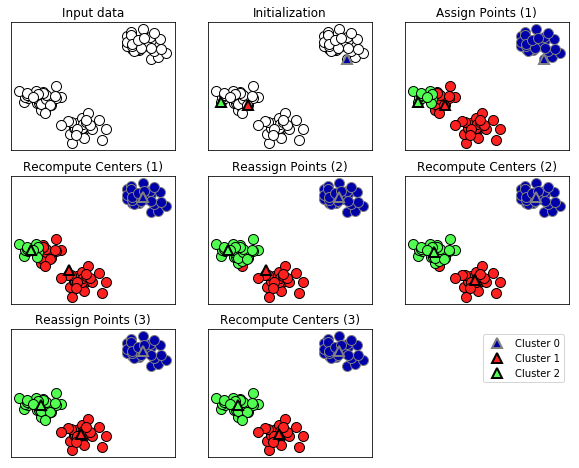

In [2]:
mglearn.plots.plot_kmeans_algorithm()

Cluster centers are shown as triangles, while data points are shown as circles. Colors indicate cluster membership. We specified that we are looking for three clusters, so the algorithm was initialized by declaring three data points randomly as cluster centers (see “Initialization”). Then the iterative algorithm starts. 

First, each data point is assigned to the cluster center it is closest to (see “Assign Points (1)”). 

Next, the cluster centers are updated to be the mean of the assigned points (see “Recompute Centers (1)”). Then the process is repeated two more times. 

After the third iteration, the assignment of points to cluster centers remained unchanged, so the algorithm stops.

Given new data points, *k-means* will assign each to the closest cluster center. The next example shows the boundaries of the cluster centers that were learned:

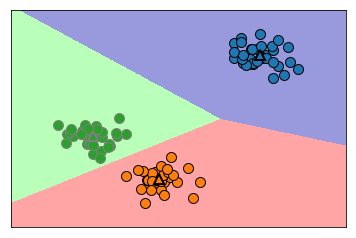

In [3]:
mglearn.plots.plot_kmeans_boundaries()

Applying *k-means* with scikit-learn is quite straightforward.  Here, we apply it to the synthetic data that we used for the preceding plots.  We instantiate the *KMeans* class, and set the number of clusters we are looking for.  Then, we call the *fit* method with the data.

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# Build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

During the algorithm, each training data point in *X* is assigned a cluster label.  You can find these labels in the *kmeans.labels_* attribute.

In [5]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


As we asked for 3 clusters, the clusters are numbered 0 to 2.

You can also assign cluster labels to new points, using the *predict* method.  Each new point is assigned to the closest cluster center when predicting, but the existing model is not changed.  Running *predict* on the training set returns the same result as *labels_*:

In [6]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


You can see that clustering is somewhat similar to classification, in that each item gets a label. However, there is no ground truth, and consequently the labels themselves have no a priori meaning. 

Let’s go back to the example of clustering face images that we discussed before. It might be that the cluster 3 found by the algorithm contains only faces of your friend Bela. You can only know that after you look at the pictures, though, and the number 3 is arbitrary. The only information the algorithm gives you is that all faces labeled as 3 are similar.

For the clustering we just computed on the two-dimensional toy dataset, that means that we should not assign any significance to the fact that one group was labeled 0 and another one was labeled 1. Running the algorithm again might result in a different numbering of clusters because of the random nature of the initialization.

Here is a plot of this data again. The cluster centers are stored in the *cluster_centers_* attribute, and we plot them as triangles:

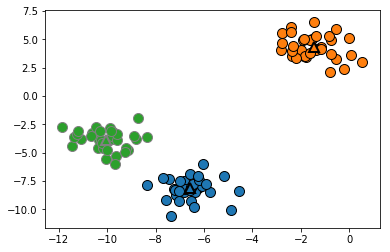

In [7]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

We can also use more or fewer cluster centers.

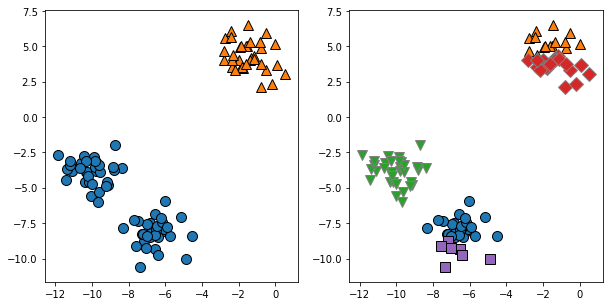

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# Using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

### Failure Cases of K-Means

Even if you know the “right” number of clusters for a given dataset, k-means might not always be able to recover them. Each cluster is defined solely by its center, which means that each cluster is a convex shape. As a result of this, k-means can only capture relatively simple shapes. k-means also assumes that all clusters have the same “diameter” in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers. 

That can sometimes lead to surprising results, as shown here:

Text(0, 0.5, 'Feature 1')

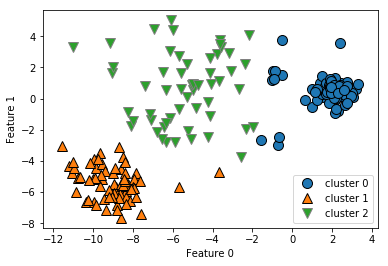

In [9]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

One might have expected the dense region in the lower left to be the first cluster, the dense region in the upper right to be the second, and the less dense region in the center to be the third. Instead, both cluster 0 and cluster 1 have some points that are far away from all the other points in these clusters that “reach” toward the center.

k-means also assumes that all directions are equally important for each cluster. The following plot (Figure 3-28) shows a two-dimensional dataset where there are three clearly separated parts in the data. However, these groups are stretched toward the diagonal. As k-means only considers the distance to the nearest cluster center, it can’t handle this kind of data:

Text(0, 0.5, 'Feature 1')

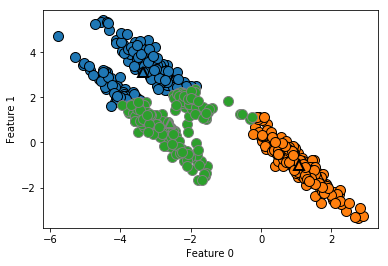

In [10]:
# Generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# Transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

*k-means* also performs poorly if the clusters have more complex shapes, like the two_moons data we encountered in Chapter 2:

Text(0, 0.5, 'Feature 1')

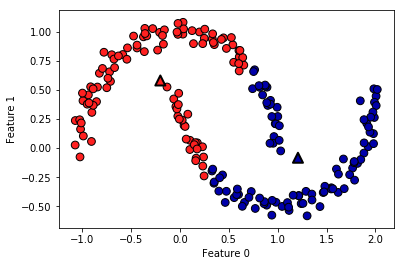

In [11]:
# Generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Here, we would hope that the clustering algorithm can discover the two half-moon shapes. However, this is not possible using the k-means algorithm.

### Vector Quantization, or Seeing K-Means as Decomposition

Even though k-means is a clustering algorithm, there are interesting parallels between k-means and the decomposition methods like PCA and NMF that we discussed earlier. You might remember that PCA tries to find directions of maximum variance in the data, while NMF tries to find additive components, which often correspond to “extremes” or “parts” of the data. Both methods tried to express the data points as a sum over some components. 

k-means, on the other hand, tries to represent each data point using a cluster center. You can think of that as each point being represented using only a single component, which is given by the cluster center. This view of k-means as a decomposition method, where each point is represented using a single component, is called *vector quantization*.

Let’s do a side-by-side comparison of PCA, NMF, and k-means, showing the components extracted, as well as reconstructions of faces from the test set using 100 components. For k-means, the reconstruction is the closest cluster center found on the training set:

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# Scale the grayscale values to be between 0 and 1
# Instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [15]:
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

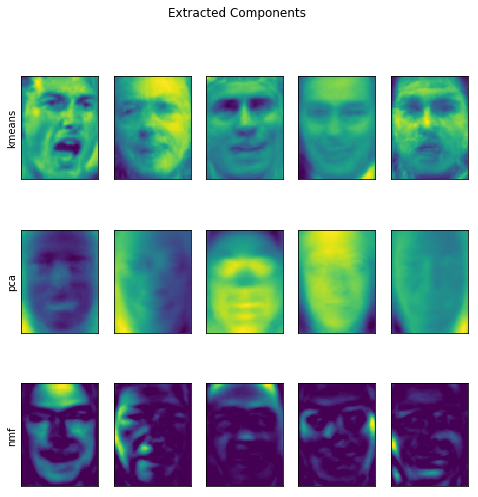

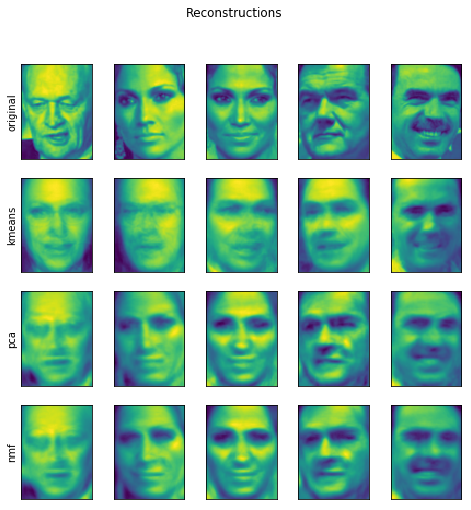

In [16]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

An interesting aspect of vector quantization using k-means is that we can use many more clusters than input dimensions to encode our data. Let’s go back to the two_moons data. Using PCA or NMF, there is nothing much we can do to this data, as it lives in only two dimensions. Reducing it to one dimension with PCA or NMF would completely destroy the structure of the data. 

But we can find a more expressive representation with k-means, by using more cluster centers:

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


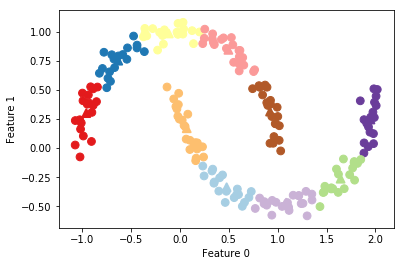

In [17]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("Cluster memberships:\n{}".format(y_pred))

We used 10 cluster centers, which means each point is now assigned a number between 0 and 9. We can see this as the data being represented using 10 components (that is, we have 10 new features), with all features being 0, apart from the one that represents the cluster center the point is assigned to. 

Using this 10-dimensional representation, it would now be possible to separate the two half-moon shapes using a linear model, which would not have been possible using the original two features. It is also possible to get an even more expressive representation of the data by using the distances to each of the cluster centers as features. 

This can be accomplished using the *transform* method of *kmeans*:

In [18]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


k-means is a very popular algorithm for clustering, not only because it is relatively easy to understand and implement, but also because it runs relatively quickly. k-means scales easily to large datasets, and scikit-learn even includes a more scalable variant in the MiniBatchKMeans class, which can handle very large datasets.

One of the drawbacks of k-means is that it relies on a random initialization, which means the outcome of the algorithm depends on a random seed. By default, scikit-learn runs the algorithm 10 times with 10 different random initializations, and returns the best result.  Further downsides of k-means are the relatively restrictive assumptions made on the shape of clusters, and the requirement to specify the number of clusters you are looking for (which might not be known in a real-world application).